# K-평균(K-Means)
- 데이터를 K개의 클러스터(그룹)로 군집화 하는 알고리즘
- 각 데이터로부터 이들이 속한 클러스터의 중심점(Centroid)까지의 평균 거리를 계산

### K-Means 동작 순서
1. K값 설정
2. 지정된 K개 만큼의 랜덤 좌표 설정
3. 모든 데이터로부터 가장 가까운 중심점 선택
4. 데이터들의 평균 중심으로 중심점 이동
5. 중심점이 더 이상 이동되지 않을 때까지 반복 (3, 4를 반복)

### 중심점 무작위 선정 문제(Random Initioalization Trap)
- 이 문제를 해결하기 위해 K-Means++ 를 만들었다

### K-Means++ 동작 순서
1. 데이터 중에서 랜덤으로 1개를 중심점으로 선택
2. 나머지 데이터로부터 중심점까지의 거리 계산
3. 중심점과 가장 먼 지점의 데이터를 다음 중심점으로 선택
4. 중심점이 K개가 될 때까지 반복
5. K-Means 방식으로 진행

### 엘보우 방법(Elbow Method)
1. 클러스터 개수 K의 변화에 따른 중심점까지의 평균 거리 비교
2. 경사가 완만해지는 지점을 K로 선정

### 유사도
- 유클리드 거리 : 두 지점의 직선 거리
- 맨해튼 거리 : x좌표의 차 + y좌표의 차
- 코사인 유사도 : 특정 점에서부터 다른 점으로 선을 그어 다른 점 끼리의 각도로 유사도 측정

In [5]:
import os
os.environ['OMP_NUM_THREADS']='1' # 경고를 없앰 참고

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dataset = pd.read_csv('KMeansData.csv')
dataset[:5]

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [8]:
X = dataset.iloc[:, :].values
# X = dataset.values 위의 문장과 같은 의미
# X dataset.to_numpy() 위의 문장과 같은 의미
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

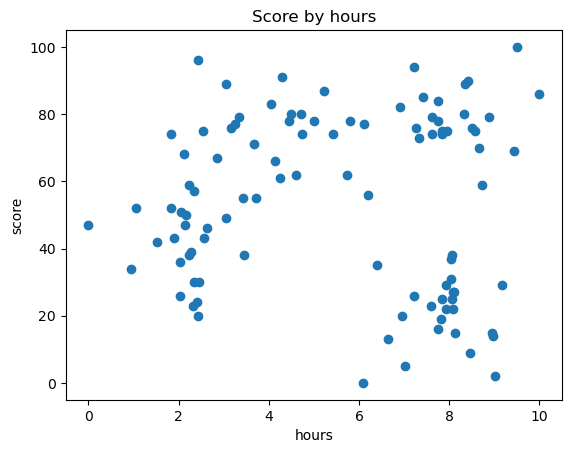

In [10]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (축 범위 통일)

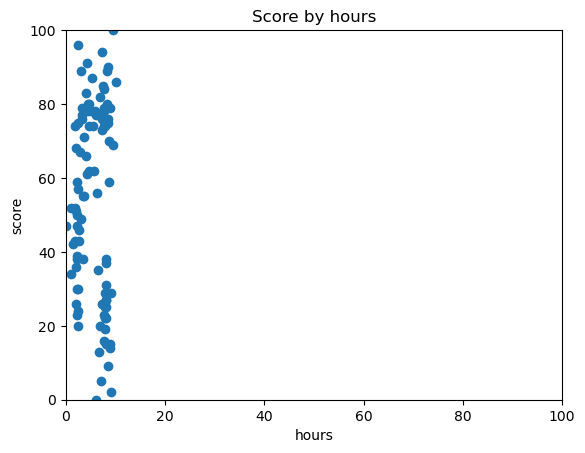

In [12]:
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('score')
plt.ylim(0, 100)
plt.show()

### 피쳐 스케일링 (Feature Scaling)

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링 된 데이터)

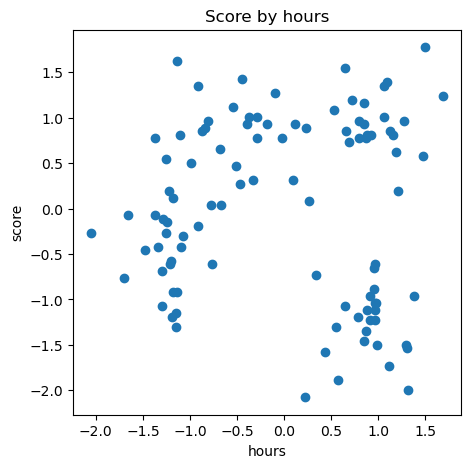

In [16]:
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1]) # x축 : hour, y축 : score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 최적의 K 값 찾기 (엘보우 방식 Elbow Method)

<function matplotlib.pyplot.show(close=None, block=None)>

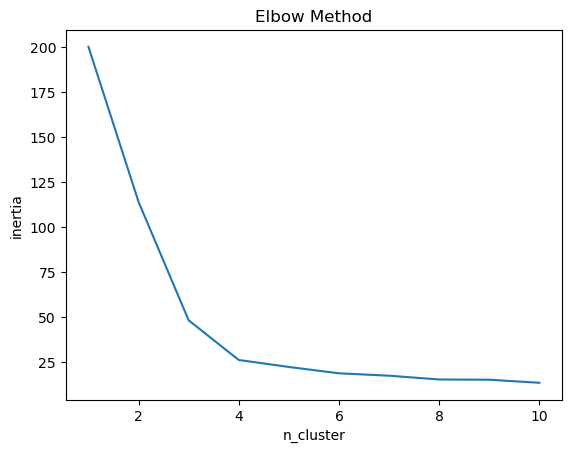

In [18]:
from sklearn.cluster import KMeans
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centriod)까지의 거리의 제곱의 합

plt.plot(range(1, 11), inertia_list)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('inertia')
plt.show # 4에서 완만해지는 것을 보면 4가 적당할것으로 보임

### 최적의 K (4) 값으로 KMeans 학습

In [20]:
K = 4 # 최적의 K 값

In [21]:
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X) # y_kmeans에 각 데이터가 어디 그룹에 속해졌는지 알 수있게 저장이 됨

In [22]:
y_kmeans

array([1, 0, 3, 0, 0, 2, 2, 0, 1, 0, 0, 3, 2, 3, 3, 0, 2, 1, 3, 0, 2, 0,
       3, 2, 1, 1, 3, 3, 3, 3, 2, 2, 3, 0, 1, 1, 3, 0, 0, 0, 3, 2, 1, 3,
       3, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 0, 0, 3, 2, 2, 1, 1, 1, 1, 2,
       2, 0, 2, 1, 3, 1, 1, 1, 3, 3, 3, 3, 0, 1, 2, 1, 2, 2, 1, 0, 3, 2,
       1, 3, 0, 2, 0, 1, 3, 0, 1, 0, 2, 3])

### 데이터 시각화 (최적의 K로)

In [24]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점(censtriod) 좌표
centers

array([[-0.54299598,  0.79316666],
       [ 0.96910697,  0.97133061],
       [ 0.8837666 , -1.26929779],
       [-1.24939347, -0.48807293]])

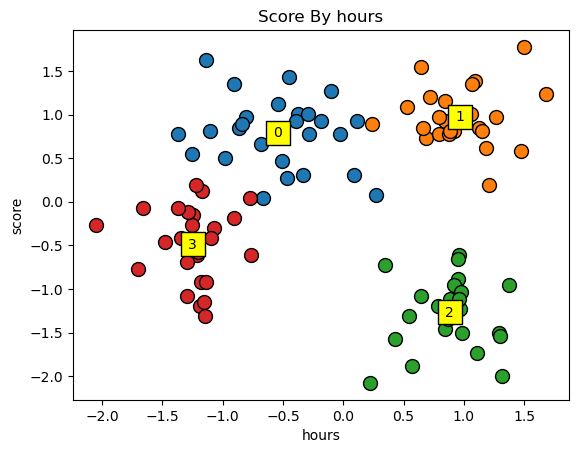

In [25]:
for cluster in range(K):
    plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터 # 지정 안했는데 색깔이 바뀌는 이유?
    plt.scatter(centers[cluster, 0], centers[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers[cluster, 0], centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력

plt.title('Score By hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

### 데이터 시각화 (스케일링 원복)
- 스케일링을 통해 수치가 이상하게 설정 되었기 때문에

In [27]:
X_org = sc.inverse_transform(X) # Feature Scaling 된 데이터를 다시 원복
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [28]:
centers_org = sc.inverse_transform(centers) # Feature Scaling 된 데이터를 다시 원복
centers_org

array([[ 4.04115385, 74.5       ],
       [ 8.08333333, 79.125     ],
       [ 7.8552    , 20.96      ],
       [ 2.1528    , 41.24      ]])

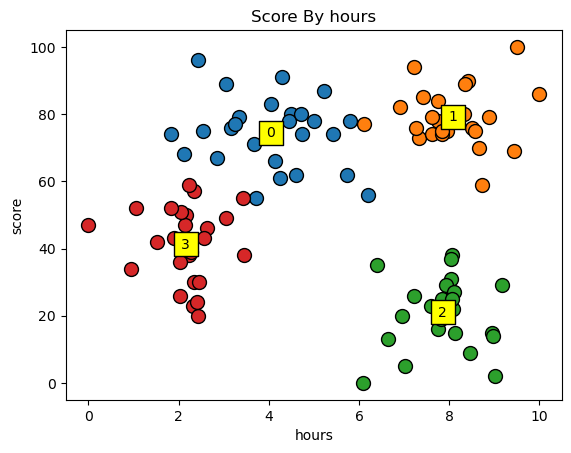

In [29]:
for cluster in range(K):
    plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster, 1], s=100, edgecolor='black') # 각 데이터
    plt.scatter(centers_org[cluster, 0], centers_org[cluster, 1], s=300, edgecolor='black', color='yellow', marker='s') # 중심점 네모
    plt.text(centers_org[cluster, 0], centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
# 색깔이 바뀌는 이유? 동영상과 다른 클러스터에 들어있는 데이터는 왜 그런지?

plt.title('Score By hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()